In [8]:
import librosa as lb
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from pathlib import Path
import torch

In [151]:
Fs = 8000
mix = torch.from_numpy(np.random.randn(int(0.256*11.3*Fs)))
print(mix.shape)

duration = 0.256
frame_length = int(duration * Fs)
hop_length = frame_length//2

L = mix.shape[0]
pad = frame_length//2

mix = torch.concat([torch.zeros(pad), mix, torch.zeros(3*pad)])

mix = mix.numpy()
mix_frames = lb.util.frame(mix, frame_length=frame_length, hop_length=hop_length) # N frames x Len frames
T, N = mix_frames.shape
mix_frames = torch.Tensor(mix_frames.copy()).T # N frames x T frames
mix = torch.from_numpy(mix)
print(mix_frames.shape)

# windowing
win = torch.hann_window(frame_length, periodic=True)
mix_frames = mix_frames * win[None,:]

# OLA
ola_mix = torch.zeros((N-1)*hop_length + frame_length)
for n in range(N):
    ola_mix[hop_length*n:hop_length*n+T] += mix_frames[n,:]
    
L = min(ola_mix.shape[0], mix.shape[0])
print(L)
ola_mix = 

SyntaxError: invalid syntax (1707710245.py, line 32)

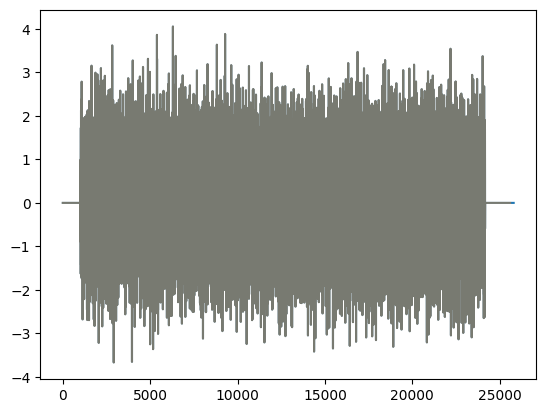

In [109]:
plt.plot(mix.numpy().T)
plt.plot(ola_mix.numpy().T, alpha=0.4)

In [111]:
plt.plot(torch.abs(ola_mix - mix).T)

RuntimeError: The size of tensor a (25600) must match the size of tensor b (25804) at non-singleton dimension 0